In [1]:
#importing libraries

import sys
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(10,6)})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


#  Read and examine the data

In [3]:
#Loading and reading dataset

data = pd.read_csv('C:\\Users\\Owner\\OneDrive - Sify Technologies Limited\\Desktop\\Dataset\\train.csv')

In [4]:
#View first few rows

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Find number of rows and columns

data.shape

(1460, 81)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Generating Summary Statistics

In [7]:
# Generate Statistical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
#Grouping the columns by type

data.columns\
    .to_series()\
    .groupby(data.dtypes)\
    .groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

## Are there any Duplicate Observations?

In [9]:
#Checking for duplicate data
data.duplicate = data.duplicated().sum()
data.duplicate

0

<AxesSubplot:xlabel='SalePrice'>

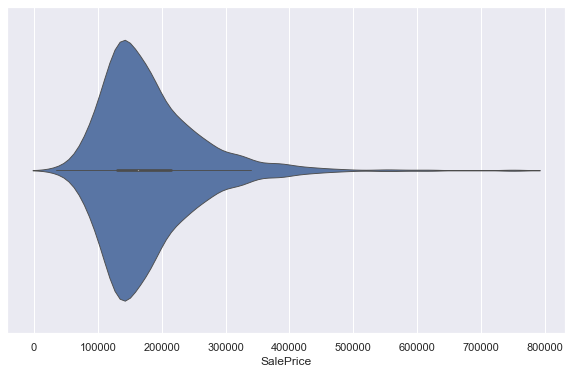

In [10]:
#Visualizing House Price range and ouliers

sns.violinplot(x = data['SalePrice'], linewidth = 0.9)


#  Visualizing heat map

In [11]:
#Finding the correlation between data
data_corr = data.corr()
data_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

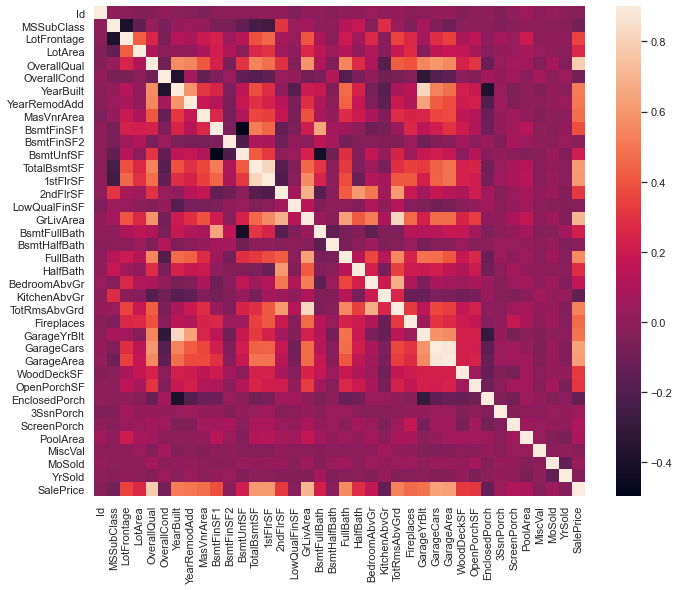

In [12]:
#visualising correlation through heat map

fig  = plt.figure(figsize = (11, 9))
sns.heatmap(data_corr, vmax =0.9, )

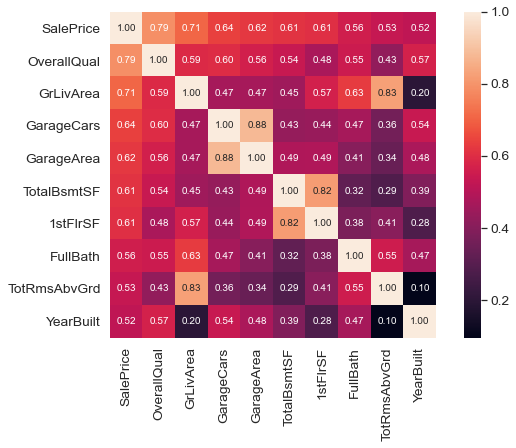

In [13]:
k = 10 #number of variables for heatmap
cols = data_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#  Plotting Histogram for Numeric Value

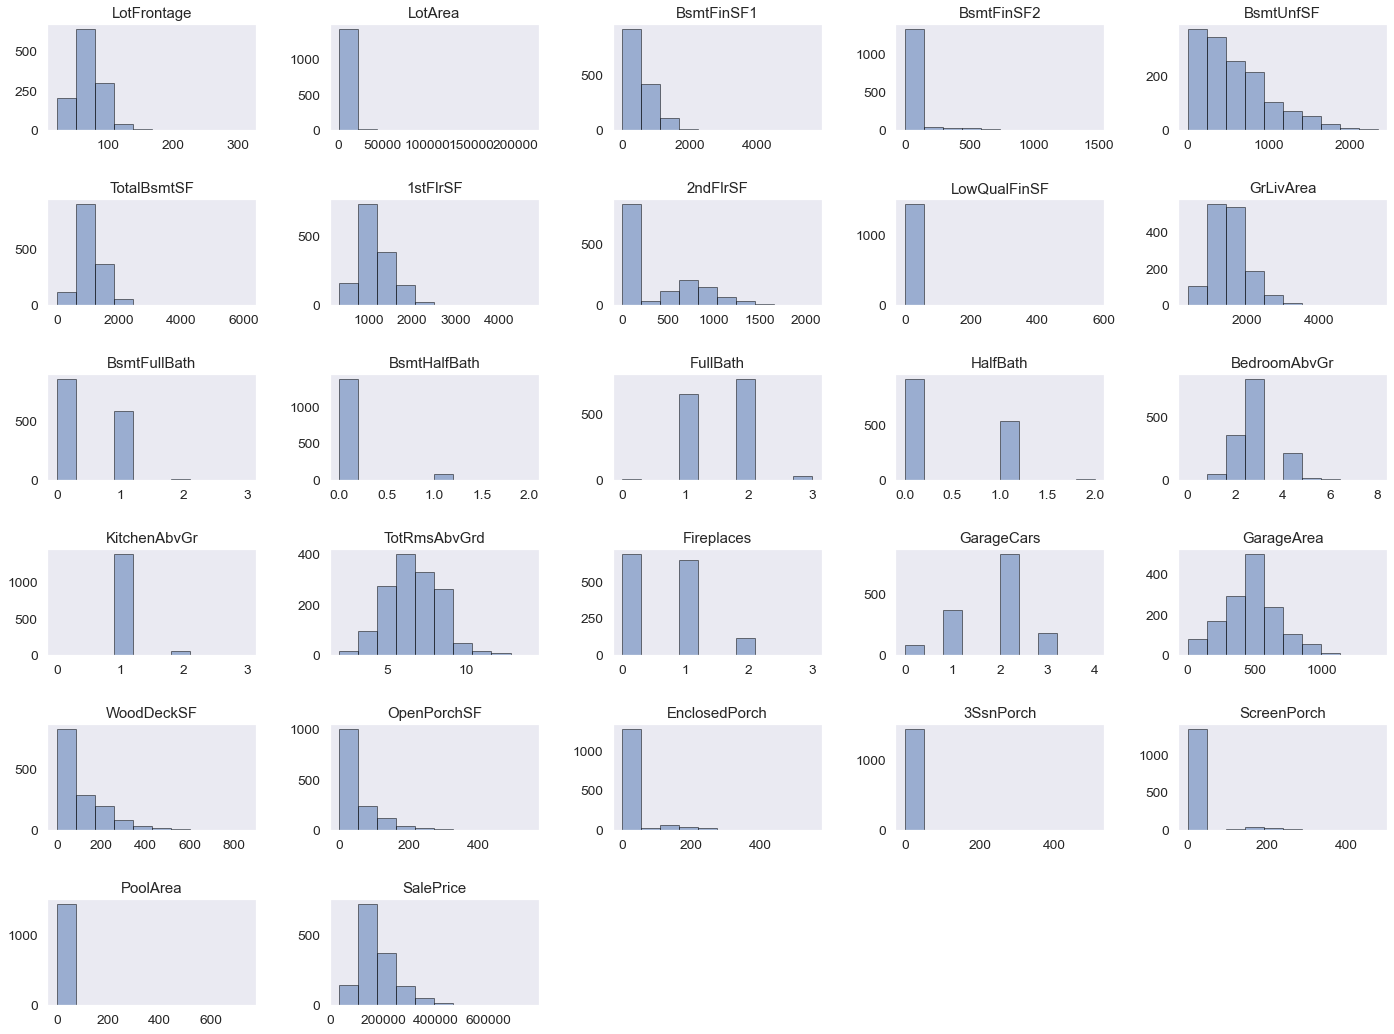

In [14]:
data.hist(column =['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
                   'LowQualFinSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
                   'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars',\
                   'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
figsize = (20, 15), alpha = 0.5,
                         edgecolor = 'black', grid = False)
plt.tight_layout(pad =2.0)

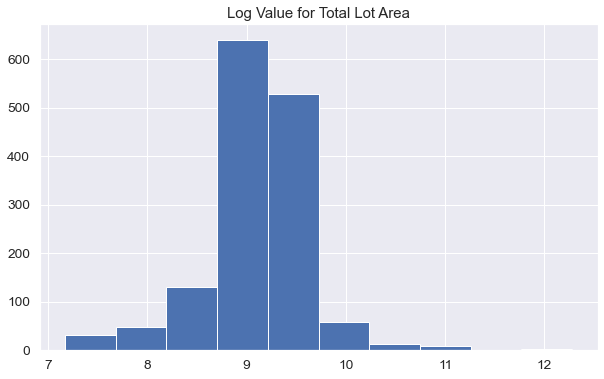

In [101]:
#Log value of lot area

np.log(data['LotArea']).hist()

plt.title('Log Value for Total Lot Area')
plt.savefig('Log value of total lot area')
plt.show()

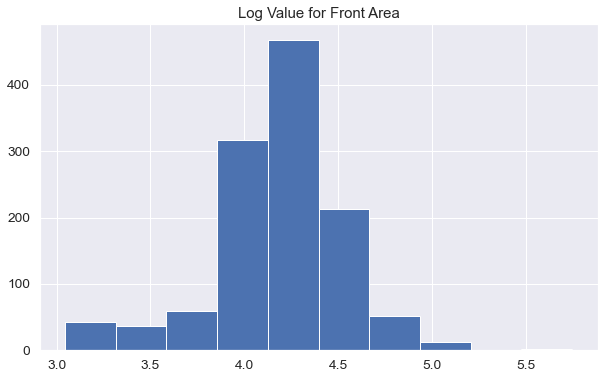

In [102]:
#Log value of Front Area

np.log(data['LotFrontage']).hist()
plt.title('Log Value for Front Area')
plt.savefig('Log Value for Front Area.png')
plt.show()

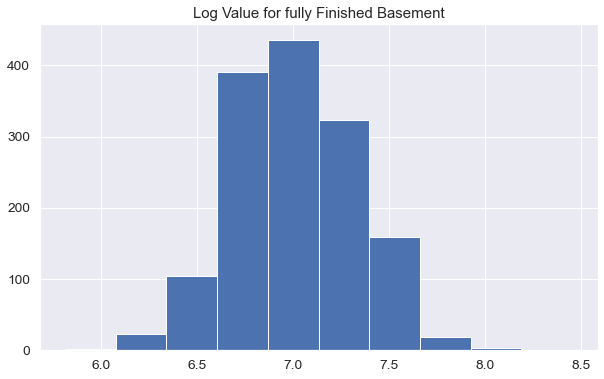

In [103]:
#Log value of Finished Basement
np.log(data['1stFlrSF']).hist()
plt.title('Log Value for fully Finished Basement')
plt.savefig('Log Value for fully Finished Basement.png')
plt.show()

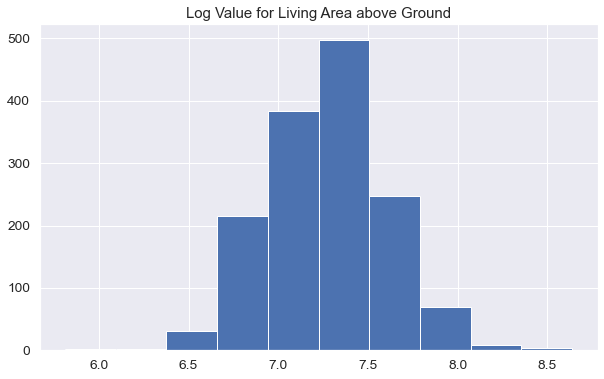

In [104]:
#Log value of Living area abovve Ground

np.log(data['GrLivArea']).hist()
plt.title('Log Value for Living Area above Ground')
plt.savefig('Log Value for Living Area above Ground.png')
plt.show()

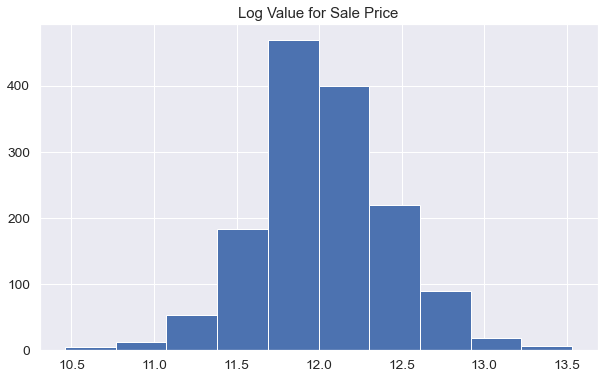

In [105]:
#Log value of Sale Price

np.log(data['SalePrice']).hist()
plt.title('Log Value for Sale Price')
plt.savefig('Log Value for Sale Price.png')
plt.show()

# Identifing and Removing Missing Value

In [20]:
#Identifing for missing value

data_missing = data.isnull().sum()
data_missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
## Generating missing value percentage

def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing values."""
  
    percent_missing = data.isnull().mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df

In [22]:
#missing value percentage

missing_value_data = missing_value_pct_df(data)

missing_value_data

,column_name,percent_missing
72,PoolQC,99.52
74,MiscFeature,96.30
6,Alley,93.77
73,Fence,80.75
57,FireplaceQu,47.26
...,...,...
27,ExterQual,0.00
24,Exterior2nd,0.00
23,Exterior1st,0.00
22,RoofMatl,0.00


In [23]:
#Dropping columns with missing value more than 70%

data_cleaned = data.drop(columns =['Id','PoolQC','MiscFeature', 'Alley', 'Fence'], axis = 1)
data_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [24]:
#filling the missing value in numeric data with mean

mean = data_cleaned.filter(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']).mean()
data_cleaned.fillna(mean, inplace = True)

In [25]:
cols = ['MasVnrType', 'FireplaceQu', 'GarageFinish', 'GarageCond', 'GarageQual', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1','BsmtExposure', 'GarageType', 'KitchenQual']

for col in cols:
    data_cleaned[col].fillna('None',inplace=True)

data_cleaned.MasVnrType.fillna(0,inplace=True)
data_cleaned['Electrical'] = data_cleaned['Electrical'].fillna(data_cleaned['Electrical'].mode()[0])

In [26]:
#Checking for Null value
data_cleaned.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

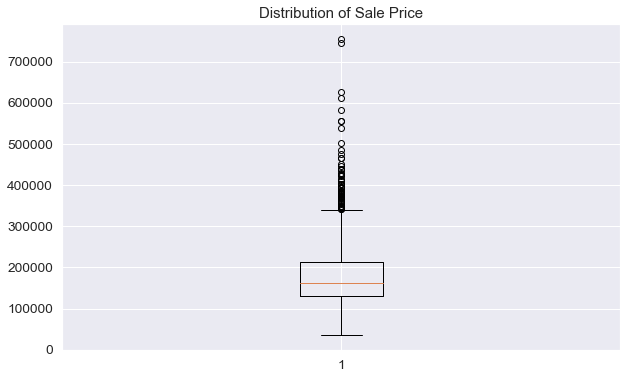

In [106]:
#Visualizing the price distribution

price = data_cleaned['SalePrice']

fig, ax = plt.subplots()
ax.boxplot(price)
plt.title('Distribution of Sale Price')
plt.savefig('Distribution of Sale Price.png')
plt.show()

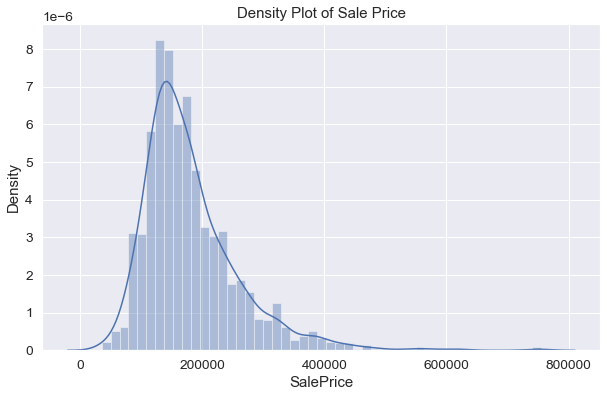

In [107]:
#Distriution of saleprice
x = data_cleaned['SalePrice']
ax =sns.distplot(x)
plt.title('Density Plot of Sale Price')
plt.savefig('Density Plot of Sale Price.png')
plt.show()

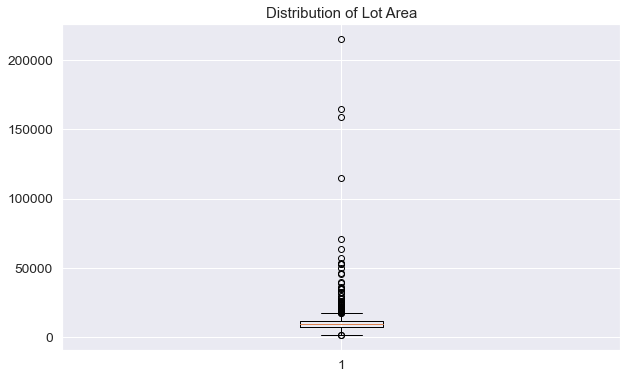

In [108]:
#visualizing Lot Area for outliers

total_area = data_cleaned['LotArea']

fig, ax = plt.subplots()
ax.boxplot(total_area)
plt.title('Distribution of Lot Area')
plt.savefig('Distribution of Lot Area.png')
plt.show()

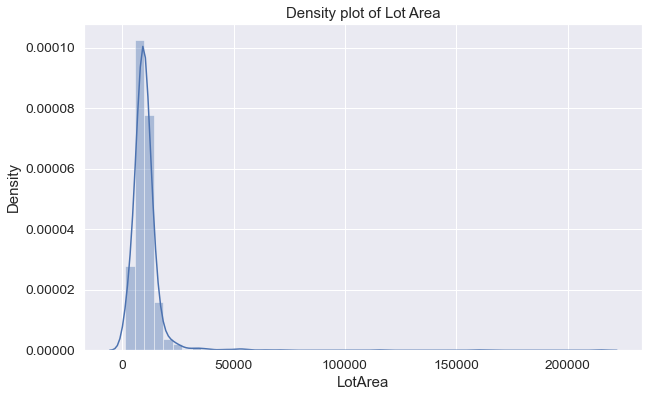

In [109]:
#Density plot of Lot Area

x = data_cleaned['LotArea']
ax =sns.distplot(x)
plt.title('Density plot of Lot Area')
plt.savefig('Density plot of Lot Area.png')
plt.show()

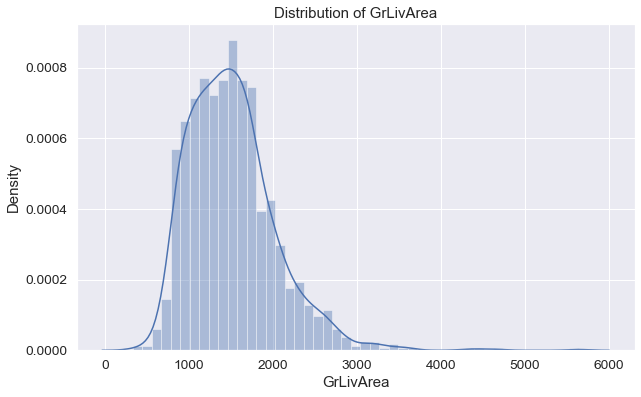

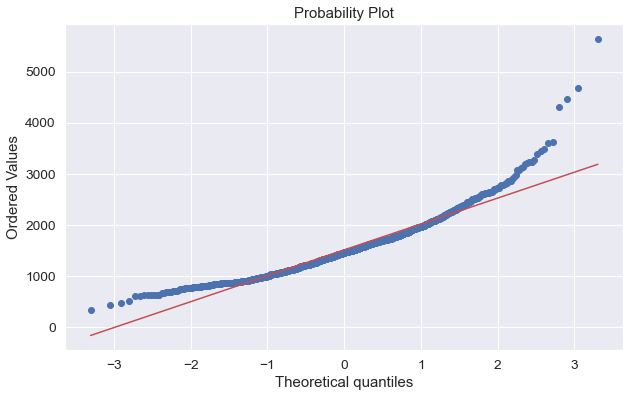

In [110]:
#distribution plot- histogram
sns.distplot(data_cleaned['GrLivArea']).set_title("Distribution of GrLivArea")
plt.savefig('distribution plot- histogram.png')

# probability plot
fig = plt.figure()
res = stats.probplot(data_cleaned['GrLivArea'], plot=plt)
plt.savefig('probability plot.png')

# Calculating and removing outliers

In [32]:
#calculating outliers

def calc_outliers(var):
    """
    Function computes....
    Arguments:
        data frame feature
    Returns:
    two values: lower bound and upper bound
    """
    # 1. Compute the 75th percentile
    q3 = np.percentile(var, 75) 
    # 2. Compute the 25th percentile
    q1 = np.percentile(var, 25)
    # 3. Compute the inter quartile range
    iqr = 1.5 * (q3 - q1)

    #find lower bound
    lb = q1 - iqr
    
    #find upper bound
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

In [33]:
calc_outliers(data_cleaned['SalePrice'])
calc_outliers(data_cleaned['LotArea'])

Lower bound of outliers: 3937.5 
Upper bound of outliers: 340037.5
Lower bound of outliers: 1481.5 
Upper bound of outliers: 17673.5


(1481.5, 17673.5)

In [34]:
data_cleaned.shape

(1460, 76)

In [35]:
#Removing Outliers

data_final = data_cleaned.loc[(data_cleaned['SalePrice'] > 3937.5) & (data_cleaned['SalePrice'] < 340037.5)]
data_final = data_cleaned.loc[(data_cleaned['LotArea'] < 17673.5)]
data_final

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


 # Data Visualization

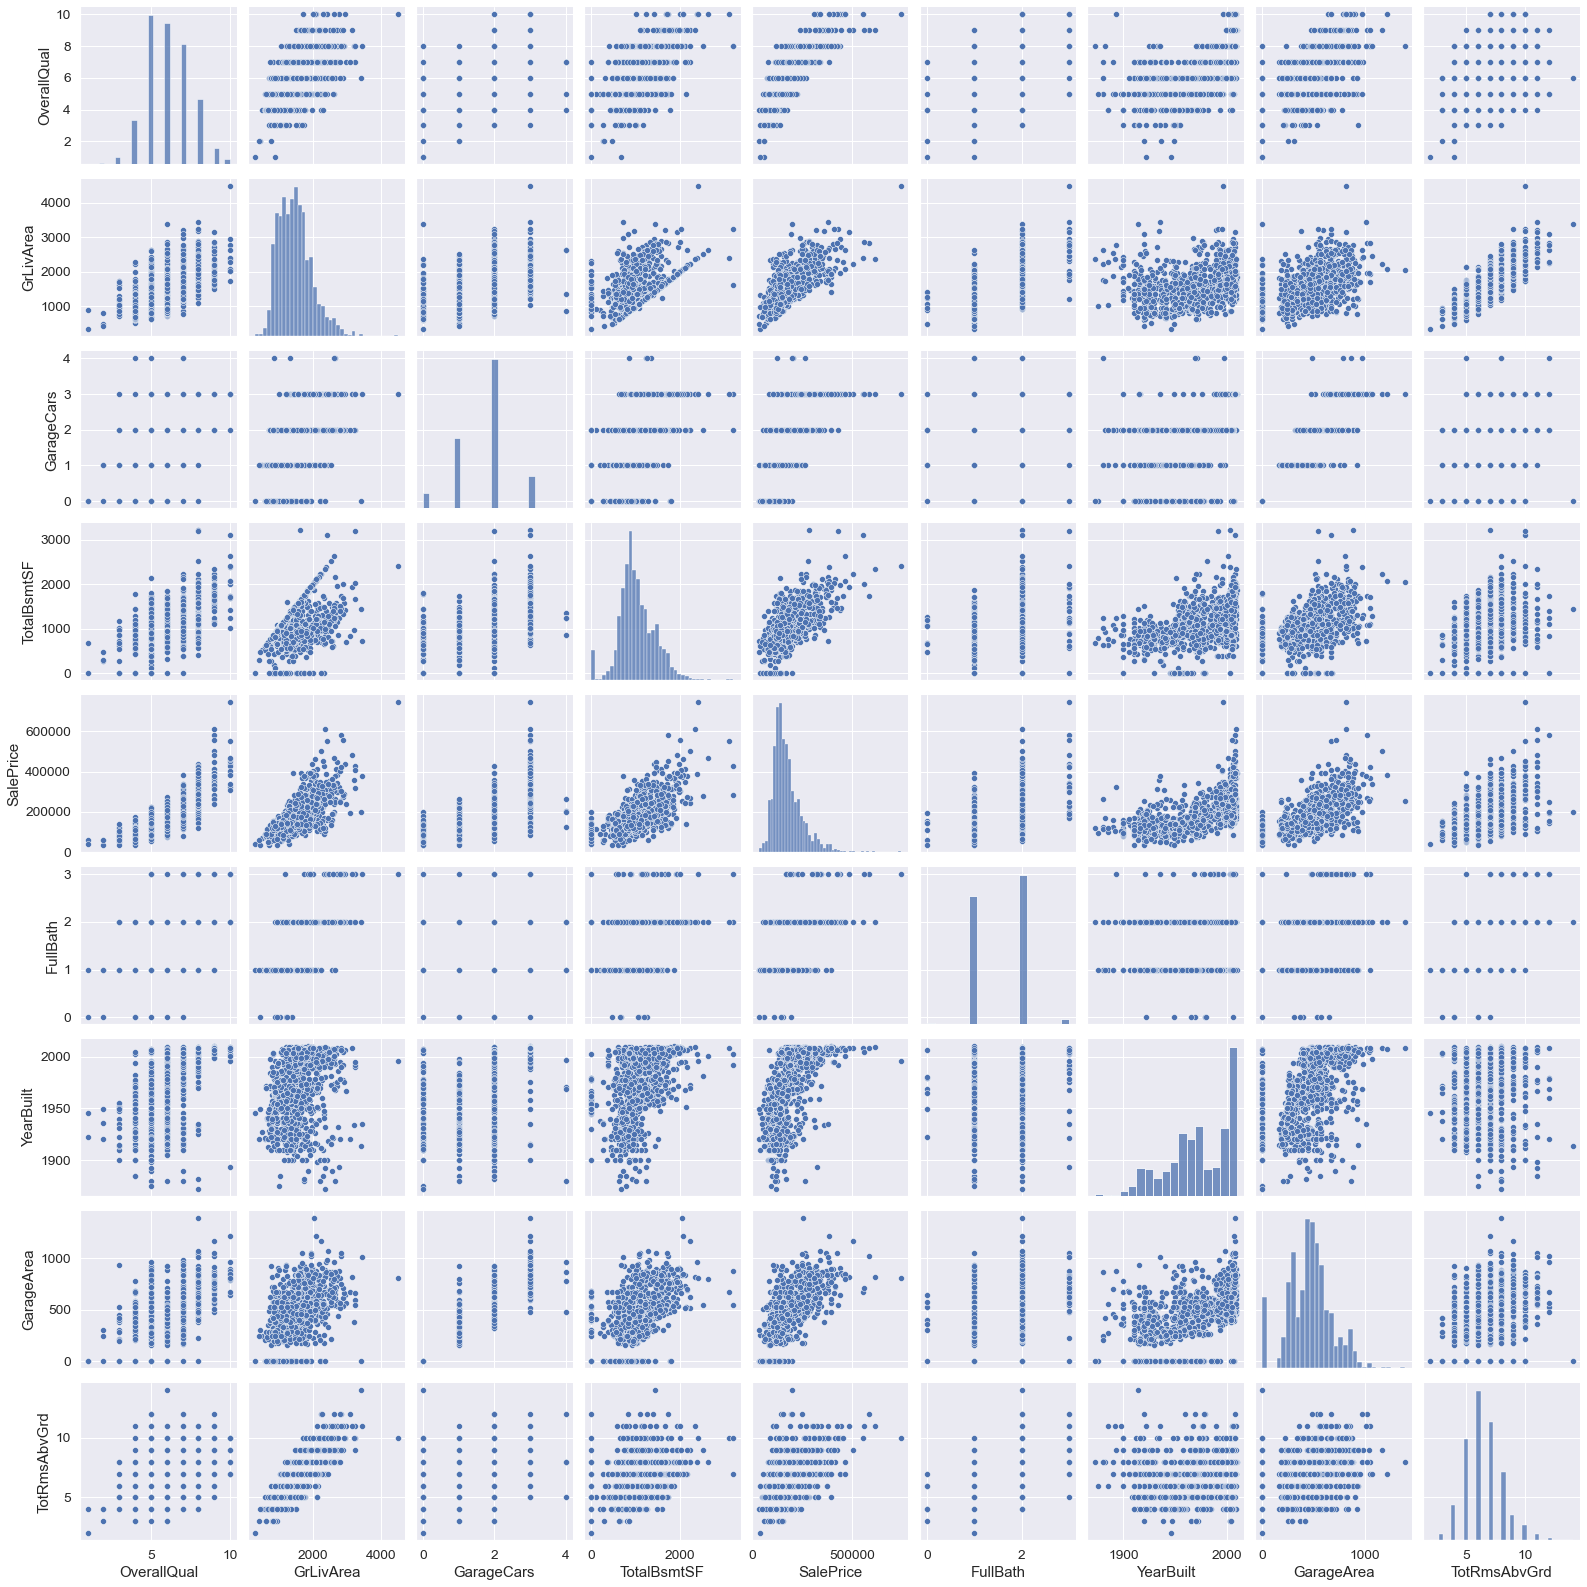

In [111]:
#Visualizing highly correlated columns using paiplot

sns.pairplot(data = data_final, vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'SalePrice',
                                        'FullBath', 'YearBuilt', 'GarageArea','TotRmsAbvGrd'])
plt.show()

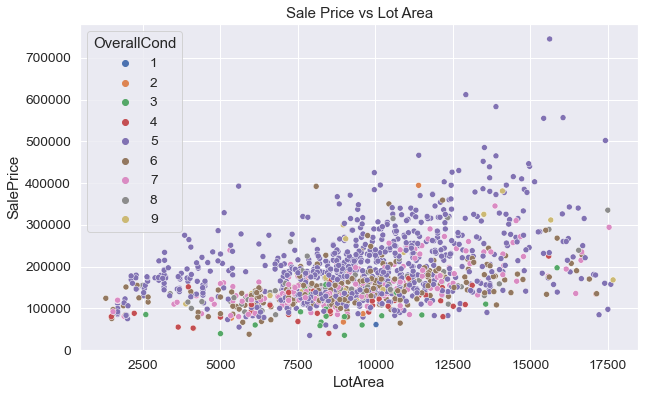

In [112]:
#Visualizing sale price to lot area

ax = sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = data_final, hue = 'OverallCond', palette = 'deep')
plt.title('Sale Price vs Lot Area')
plt.savefig('Sale Price vs Lot Area.png')
plt.show()

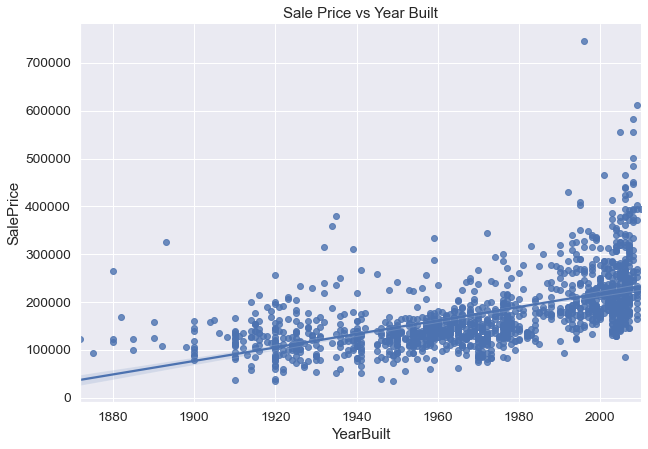

In [113]:
#visualizing sale price to the year built

ax = sns.lmplot(x="YearBuilt", y="SalePrice", data=data_final, height = 6, aspect = 1.5)
plt.title("Sale Price vs Year Built")
plt.savefig('Sale Price vs Year Built.png')
plt.show()

In [39]:
zone_count = data_final.groupby(['YrSold'])['MSZoning'].value_counts().reset_index(name = 'count')
zone_count

,YrSold,MSZoning,count
0,2006,RL,228
1,2006,RM,49
2,2006,FV,13
3,2006,RH,3
4,2006,C (all),2
5,2007,RL,246
6,2007,RM,45
7,2007,FV,15
8,2007,RH,6
9,2007,C (all),1


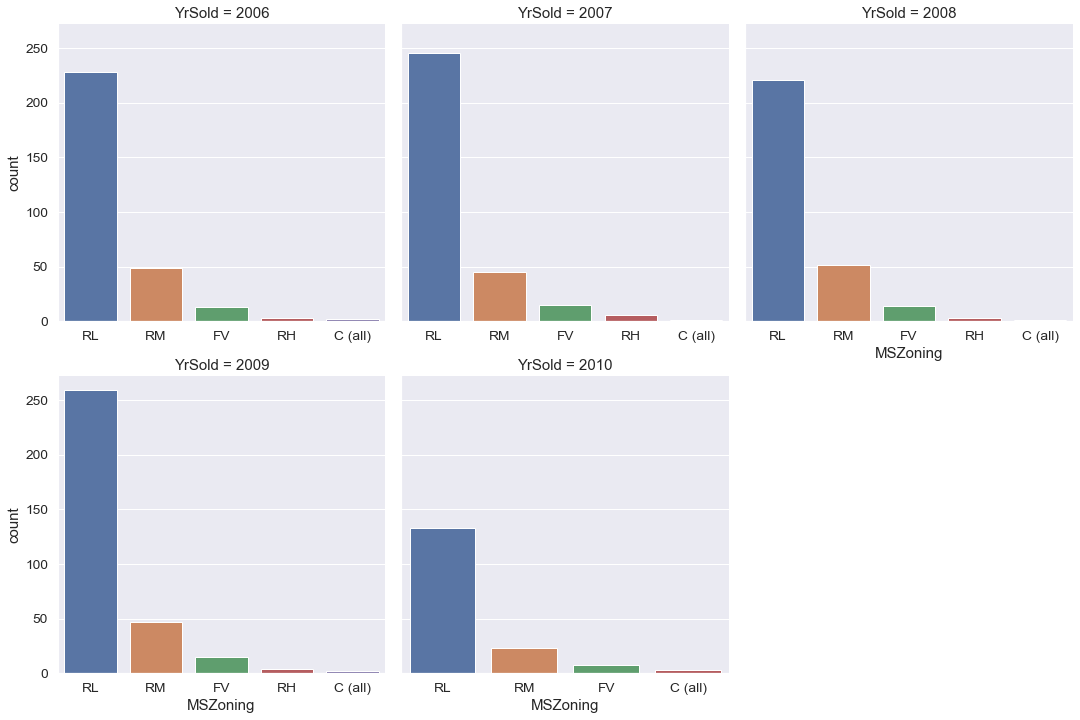

In [114]:
#Visualization of house sold in each zone for every year

sns.catplot(
    data=zone_count,
    kind='bar',
    col='YrSold',
    y='count',
    x='MSZoning',
    col_wrap=3,
    sharex=False,
)
plt.savefig('House sold in each zone for every year.png')
plt.show()

In [41]:
price_mean =data_final.groupby(['MoSold','MSZoning'])['SalePrice'].mean().reset_index(name='mean')
price_mean

,MoSold,MSZoning,mean
0,1,C (all),102776.000000
1,1,FV,272450.000000
2,1,RL,175823.425000
3,1,RM,120555.555556
4,2,FV,186350.000000
5,2,RL,184714.755556
6,2,RM,113000.000000
7,3,FV,170600.000000
8,3,RH,170000.000000
9,3,RL,192983.810127


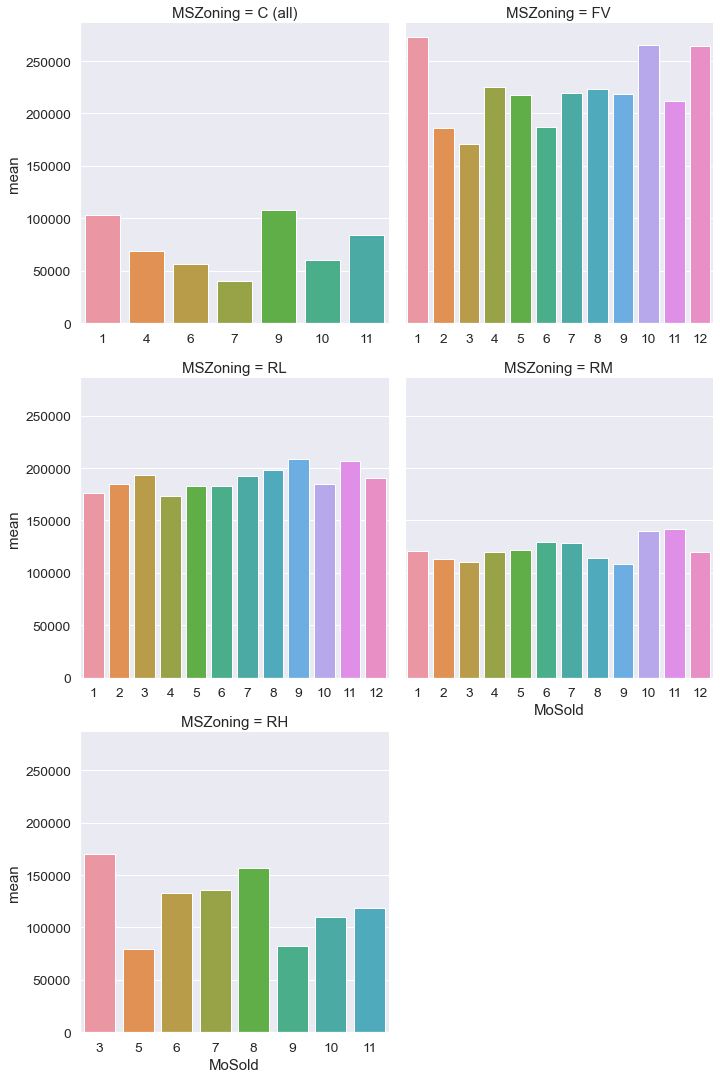

In [115]:
#Average price of house for each zone

sns.catplot(
    data=price_mean,
    kind='bar',
    col='MSZoning',
    y='mean',
    x='MoSold',
    col_wrap=2,
    sharex=False,
)
plt.savefig('Average price of house for each zone.png')
plt.show()

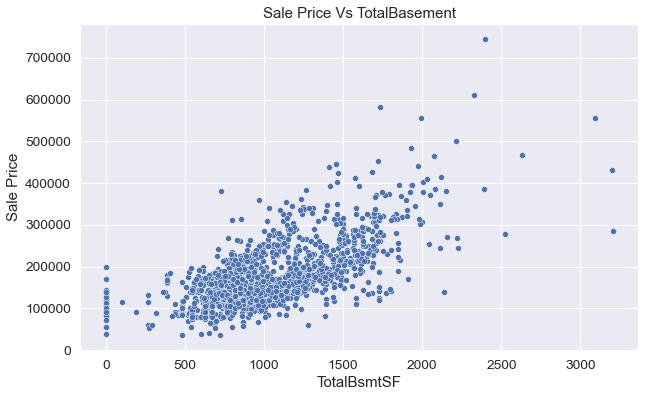

In [116]:
#Visualization of sale price vs total basement area

sns.scatterplot(data = data_final, x = 'TotalBsmtSF', y = 'SalePrice')


plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.title('Sale Price Vs TotalBasement')
plt.savefig('sale price vs total basement area.png')
plt.show()

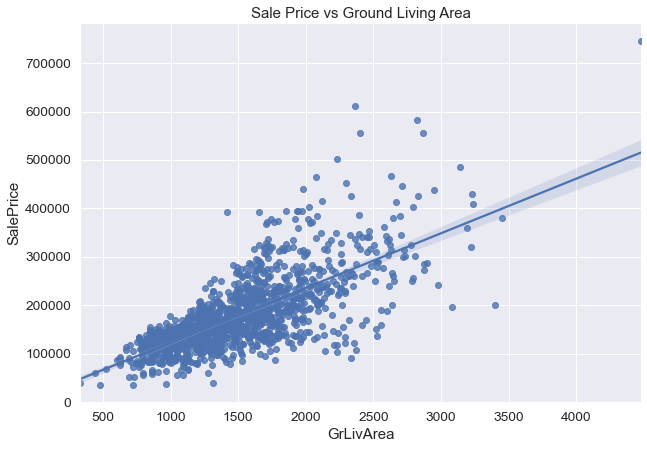

In [117]:
#visualizing sale price in compare with GrLivArea

ax = sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = data_final, height = 6, aspect = 1.5)
plt .title('Sale Price vs Ground Living Area')
plt.savefig('Sale Price vs Ground Living Area.png')
plt.show()

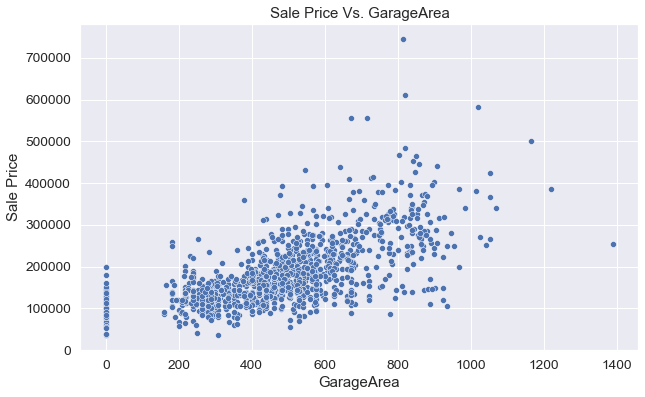

In [118]:
#Visualizing the sales price depend on Garage area

sns.scatterplot(data = data_final, x = 'GarageArea', y = 'SalePrice')
plt.title('Sale Price Vs. GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Sale Price')
plt.savefig('Sale Price Vs. GarageArea.png')
plt.show()

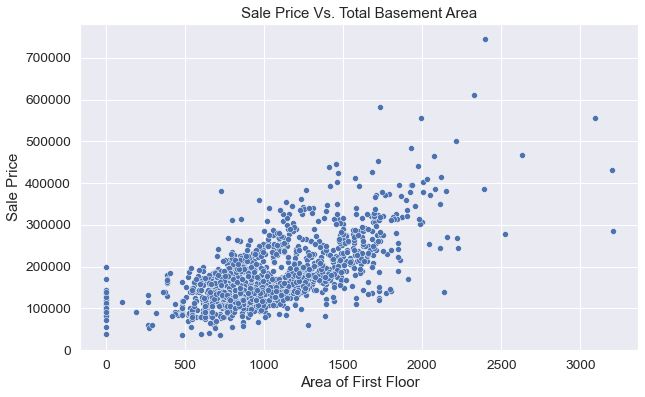

In [46]:
#Visualizing the sales price depend on total basement area

sns.scatterplot(data = data_final, x = 'TotalBsmtSF', y = 'SalePrice')
plt.title('Sale Price Vs. Total Basement Area')
plt.xlabel('Area of First Floor')
plt.ylabel('Sale Price')
plt.show()

In [47]:
#Calculating and visualizing the mean sale price for each zone

df_sale = data_final.groupby(data_final['MSZoning'])['SalePrice'].mean().reset_index()
df_sale

,MSZoning,SalePrice
0,C (all),73808.888889
1,FV,214014.061538
2,RH,131558.375000
3,RL,188173.308188
4,RM,123921.615741


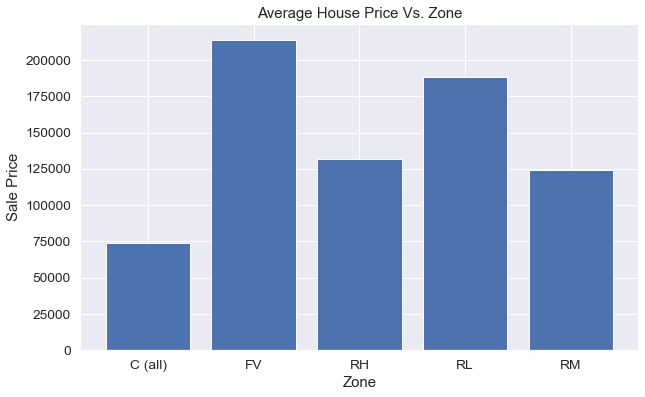

In [119]:
plt.bar(df_sale['MSZoning'], df_sale['SalePrice'])

plt.title('Average House Price Vs. Zone')
plt.xlabel('Zone')
plt.ylabel('Sale Price')
plt.savefig('Average House Price Vs. Zone.png')
plt.show()

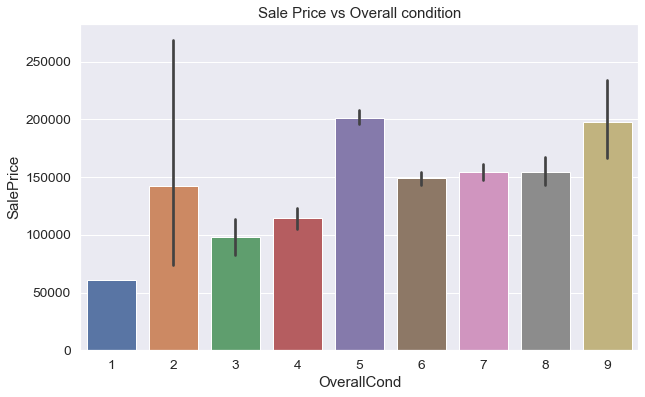

In [120]:
#comparing sale price with over all condition 

ax = sns.barplot(x="OverallCond", y="SalePrice", data=data_final, )
plt.title('Sale Price vs Overall condition')
plt.savefig('Sale Price vs Overall condition.png')
plt.show()

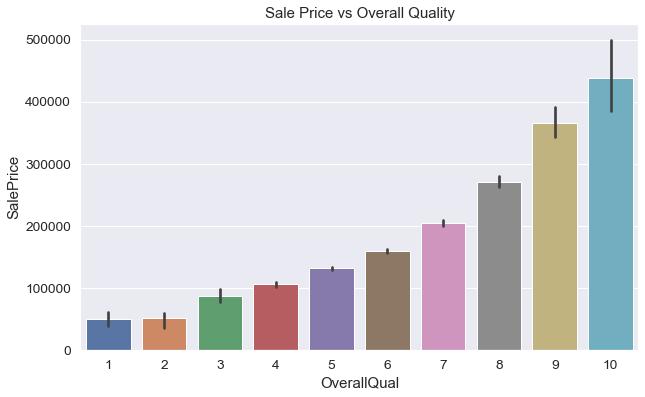

In [121]:
#comparing sale price with over all quality

ax = sns.barplot(x= 'OverallQual', y = 'SalePrice', data = data_final)
plt.title('Sale Price vs Overall Quality')
plt.savefig('Sale Price vs Overall Quality.png')
plt.show()

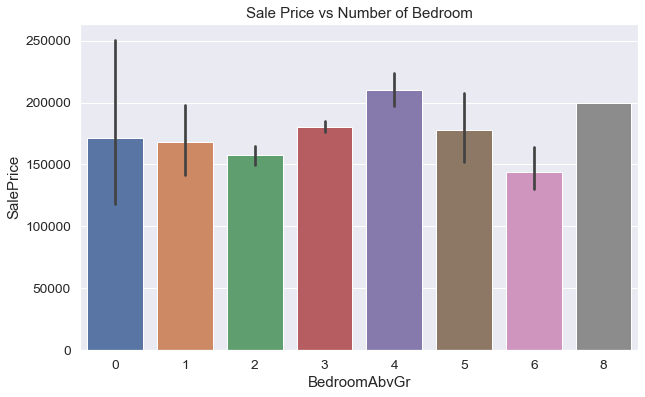

In [122]:
#comparing sale price with number of bedroom

ax = sns.barplot(x = 'BedroomAbvGr', y = 'SalePrice', data = data_final)
plt.title('Sale Price vs Number of Bedroom')
plt.savefig('Sale Price vs Number of Bedroom.png')
plt.show()

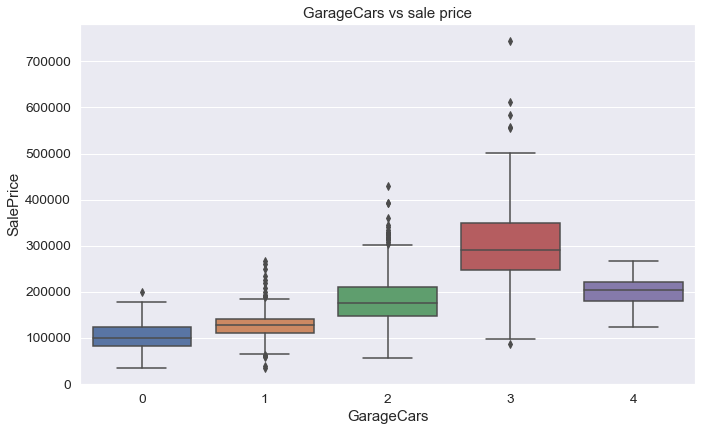

In [123]:
#Visualizing the sales price depend on Garage cars

plt.figure(figsize=(10,6))
sns.boxplot(data=data_final, y='SalePrice',x='GarageCars')
plt.tight_layout()
plt.title('GarageCars vs sale price')
plt.savefig('GarageCars vs sale price.png')
plt.show()

In [61]:
# loading and reading test data

test_data = pd.read_csv('C:\\Users\\Owner\\OneDrive - Sify Technologies Limited\\Desktop\\Dataset\\test.csv')

In [74]:
pd.set_option('display.max_columns', None)

In [77]:
test_data.tail(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1429,30,RM,50.000000,7030,1,3,3,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1925,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,641.0,641.0,GasA,Gd,Y,SBrkr,641,0,0,641,0.0,0.0,1,0,2,1,Fa,4,Typ,0,None,Detchd,1925.000000,Unf,1.0,272.0,TA,TA,N,184,0,70,0,0,0,0,3,2006,WD,Normal
1430,50,RM,75.000000,9060,1,3,3,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,5,1957,1957,Gable,CompShg,MetalSd,MetalSd,BrkFace,327.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,967.0,967.0,GasA,Gd,Y,SBrkr,967,671,0,1638,0.0,0.0,2,0,4,1,Gd,6,Typ,0,None,Detchd,1957.000000,Unf,1.0,384.0,TA,TA,Y,0,21,0,0,0,0,0,4,2006,WD,Normal
1431,30,C (all),69.000000,12366,1,3,3,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,None,None,1977.721217,None,0.0,0.0,None,None,N,0,0,23,0,0,0,0,10,2006,WD,Abnorml
1432,190,C (all),50.000000,9000,1,3,3,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,5,6,1951,1951,Gable,CompShg,WdShing,Wd Shng,None,0.0,Fa,Fa,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,660.0,660.0,GasA,TA,N,SBrkr,1060,336,0,1396,0.0,0.0,2,0,4,2,TA,8,Min2,0,None,None,1977.721217,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,0,10,2006,WD,Abnorml
1433,50,C (all),60.000000,8520,0,3,0,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Fa,Fa,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,Fa,N,SBrkr,576,360,0,936,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,None,1977.721217,None,0.0,0.0,None,None,N,0,0,0,0,0,0,0,4,2006,WD,Normal
1434,120,RM,41.000000,5748,1,0,1,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,473.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1573.0,Unf,0.0,0.0,1573.0,GasA,Ex,Y,SBrkr,1778,0,0,1778,2.0,0.0,2,0,2,1,Ex,5,Typ,1,Gd,Attchd,2005.000000,Fin,2.0,495.0,TA,TA,Y,123,53,0,0,153,0,0,2,2006,New,Partial
1435,120,RM,44.000000,3842,1,0,1,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,186.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1564.0,Unf,0.0,30.0,1594.0,GasA,Ex,Y,SBrkr,1646,0,0,1646,1.0,1.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2004.000000,Fin,2.0,525.0,TA,TA,Y,128,53,0,0,155,0,0,12,2006,WD,Normal
1436,20,RL,69.000000,23580,1,0,3,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,6,6,1979,1979,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,776.0,Unf,0.0,849.0,1625.0,GasA,TA,Y,SBrkr,1625,0,0,1625,0.0,1.0,2,0,3,1,Fa,6,Typ,1,TA,Attchd,1979.000000,Fin,2.0,576.0,TA,TA,Y,136,28,0,0,0,0,0,9,2006,WD,Normal
1437,90,RL,65.000000,8385,1,3,3,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,6,5,1978,1978,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,1664.0,1664.0,GasA,TA,Y,SBrkr,1664,0,0,1664,0.0,0.0,2,0,4,2,TA,10,Typ,0,None,2Types,1978.000000,Unf,2.0,616.0,TA,TA,Y,0,0,0,0,0,0,0,10,2006,WD,Normal
1438,20,RL,70.000000,9116,1,3,3,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1491.0,1491.0,GasA,Ex,Y,SBrkr,1491,0,0,1491,0.0,0.0,2,0,3,1,Gd,7,Typ,0,None,Attchd,2001.000000,RFn,2.0,

In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [64]:
test_data.shape

(1459, 80)

In [65]:
#dropping columns with morethan 70% missing value

test_data.drop(columns =['Id','PoolQC','MiscFeature', 'Alley', 'Fence'], axis = 1, inplace=True)

In [66]:
#Replacing the missing value with mean value

mean = test_data.filter(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']).mean()
test_data.fillna(mean, inplace = True)

In [67]:
columns = ['BsmtQual', 'BsmtCond', 'BsmtFinType2','Functional', 'SaleType', 'BsmtFinType1', 'Exterior2nd',  'Exterior1st', 'GarageQual','GarageType', 'FireplaceQu', 'BsmtExposure', 'GarageFinish', 'MasVnrType', 'GarageCond']

for col in columns:
    test_data[col].fillna('None', inplace =True)


test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])

#test_data[cols]=test_data[cols].fillna(test_data.mode().iloc[0])

columns = ['GarageArea', 'GarageCars', 'BsmtFinSF1']
test_data[columns]=test_data[columns].fillna(test_data.mean().iloc[0])

In [68]:
#Checking for missing value

test_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

# Model Predection

In [69]:
cols = data_final.select_dtypes(include='object').columns

In [ ]:
test_dta[cat]=df[cat].astype('category')

In [81]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
label_encoder = preprocessing.LabelEncoder()
for i in cols:
    data_final[i]= label_encoder.fit_transform(data_final[i])
    test_data[i]= label_encoder.fit_transform(test_data[i].astype(str))

In [82]:
X = data_final.drop(['SalePrice'],axis=1)
y = data_final['SalePrice']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

In [85]:
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

# LinearRegression

In [86]:
reg=LinearRegression(normalize = True, n_jobs=-1)

In [87]:
reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [88]:
print('coefficients: ', reg.coef_)

coefficients:  [-5.22798122e+01 -6.31212995e+02  1.20983419e+02  1.39632634e+00
  4.01976691e+04  1.85863885e+02 -2.50683147e+03 -3.57715689e+04
 -6.83514265e+01 -1.50747334e+03 -5.29352589e+01 -7.08986691e+02
 -3.17127419e+03 -9.75348449e+02  5.40987537e+02  8.19712771e+03
  5.04812373e+03  3.00184719e+02  3.90594349e+01  9.04317687e+02
 -2.08677980e+03 -9.62566612e+02  3.79451838e+02  7.79796279e+03
  2.56155819e+01 -1.04250337e+04  3.95744467e+02  1.24110912e+03
 -3.58424221e+03  1.29063093e+03 -1.78226588e+03  3.69800759e+02
 -8.14200882e+13 -3.92935006e+02 -8.14200882e+13 -8.14200882e+13
  8.14200882e+13 -3.22952717e+03 -3.12445083e+02  2.41206858e+03
 -3.14164569e+02  2.89588776e+13  2.89588776e+13  2.89588776e+13
 -2.89588776e+13  1.07434246e+03 -2.87851532e+03  1.69517032e+03
  5.13303025e+02 -8.71245520e+03 -2.39465066e+04 -7.23803328e+03
  1.98078392e+03  6.08876749e+03  1.64281712e+03 -2.09839041e+03
  2.26469405e+03 -5.15789545e+01 -1.20162848e+03  1.30378278e+03
  2.132617

In [89]:
print('intercept: ', reg.intercept_)

intercept:  210553.144524237


In [90]:
reg.score(X_test, y_test)

0.8800819560543176

In [91]:
reg.score(X_train,y_train)

0.9058180825691489

In [92]:
y_pred = reg.predict(X_test)


In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 16918.080382256787


In [94]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.16713099438648354

In [95]:
print(reg.score(X_train,y_train))

0.9058180825691489
